In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Auto Sales data.csv to Auto Sales data (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv('Auto Sales data.csv')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.shape

(2747, 20)

In [ ]:
df['PHONE'].unique()

array(['2125557818', '26.47.1555', '+33 1 46 62 7555', '6265557265',
       '6505556809', '20.16.1555', '+47 2267 3215', '(1) 47.55.6555',
       '03 9520 4555', '2125551500', '2015559350', '2035552570',
       '40.67.8555', '6175558555', '90-224 8555', '07-98 9555',
       '2155551555', '6562-9555', '+61 2 9495 8555', '5085552555',
       '(171) 555-2282', '(91) 555 94 44', '0921-12 3555',
       '(91) 555 22 82', '+65 221 7555', '2125558493', '61-7-3844-6555',
       '2155554695', '78.32.5555', '(604) 555-3392', '3105553722',
       '6175555555', '2035559545', '+81 3 3584 0555', '011-4988555',
       '0695-34 6555', '30.59.8555', '4155551450', '6035558647',
       '02 9936 8555', '(514) 555-8054', '+81 06 6342 5555', '2155559857',
       '40.32.2555', '9145554562', '31 12 3555', '(171) 555-0297',
       '5085559555', '61.77.6555', '(171) 555-7555', '(93) 203 4555',
       '7605558146', '(02) 5554 67', '(604) 555-4555', '6175559555',
       '(198) 555-8888', '981-443655', '4085553659'

In [ ]:
len(df['ORDERNUMBER'].unique())

298

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import numpy as np
len(df[~np.isclose(df['SALES'], df['PRICEEACH'] * df['QUANTITYORDERED'], atol=0.00)])

0

In [ ]:
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
DAYS_SINCE_LASTORDER,int64
STATUS,object
PRODUCTLINE,object
MSRP,int64


In [ ]:
df['ORDERNUMBER'] = df['ORDERNUMBER'].astype(str)

In [ ]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)
df['ORDERDATE'].head()

,ORDERDATE
0,2018-02-24
1,2018-05-07
2,2018-07-01
3,2018-08-25
4,2018-10-28


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


### Attributes with Classes

- **ORDERLINENUMBER**: 18 classes  
- **STATUS**: 6 classes  
- **PRODUCTLINE**: 7 classes  
- **PRODUCTCODE**: 109 classes  
- **CUSTOMERNAME**: 89 classes  
- **CITY**: 71 classes  
- **POSTALCODE**: 73 classes  
- **COUNTRY**: 19 classes  


In [ ]:
# Convert categorical columns to 'category'
cat_cols = ['ORDERLINENUMBER', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
ORDERNUMBER,object
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,category
SALES,float64
ORDERDATE,datetime64[ns]
DAYS_SINCE_LASTORDER,int64
STATUS,category
PRODUCTLINE,category
MSRP,int64


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df['ORDERDATE'].sort_values()

# from 2018/01/06 to 2020/05/31

,ORDERDATE
1959,2018-01-06
652,2018-01-06
1219,2018-01-06
552,2018-01-06
797,2018-01-09
...,...
1414,2020-05-31
651,2020-05-31
698,2020-05-31
1292,2020-05-31


In [ ]:
df['SALES'].sort_values()

# from 482.13 to 14082.80

,SALES
2179,482.13
1238,541.14
1978,553.95
1497,577.60
1758,640.05
...,...
96,11886.60
1020,11887.80
49,12001.00
714,12536.50


##Grouping variables

###Order info
* ORDERNUMBER
* QUANTITYORDERED
* PRICEEACH
* ORDERLINENUMBER
* SALES
* ORDERDATE
* STATUS
* DEALSIZE

###Product info
* PRODUCTLINE
* MSRP
* PRODUCTCODE

###Customer info
* DAYS_SINCE_LASTORDER
* CUSTOMERNAME
* PHONE
* ADDRESSLINE1
* CITY
* POSTALCODE
* COUNTRY
* CONTACTLASTNAME
* CONTACTFIRSTNAME


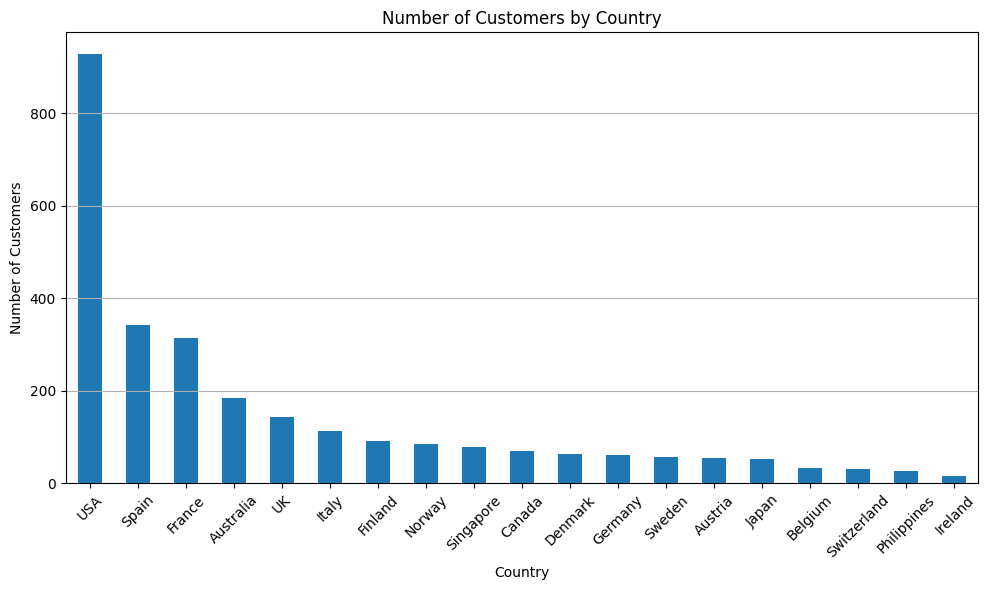

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot number of customers from each country
country_counts = df['COUNTRY'].value_counts()


# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

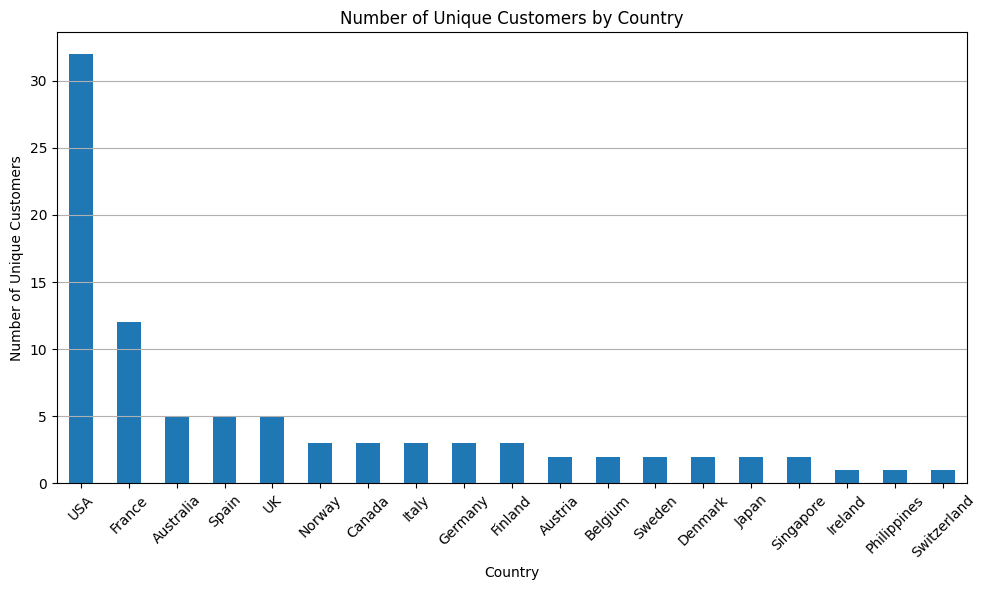

In [ ]:
unique_customers = df[['CUSTOMERNAME', 'COUNTRY']].drop_duplicates()
country_counts = unique_customers['COUNTRY'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Unique Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1534693300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEALSIZE', y='SALES', palette='Set2')
/tmp/ipython-input-1534693300.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


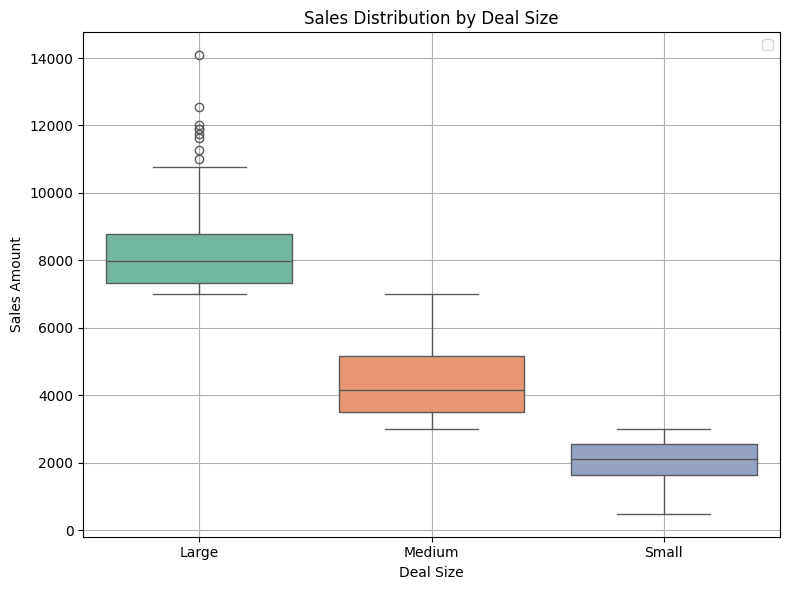

In [ ]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DEALSIZE', y='SALES', palette='Set2')

# Customize plot
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2615245136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_country = df.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False)


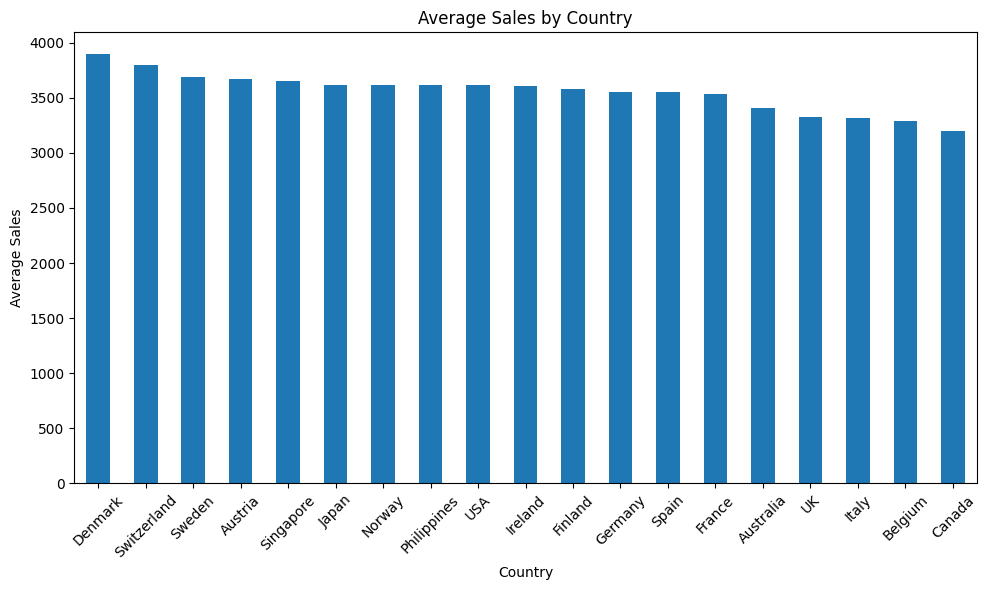

In [ ]:
avg_sales_by_country = df.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
avg_sales_by_country.plot(kind='bar')
plt.title('Average Sales by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipython-input-3415040178.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deal_counts = df.groupby(['COUNTRY', 'DEALSIZE']).size().unstack(fill_value=0)


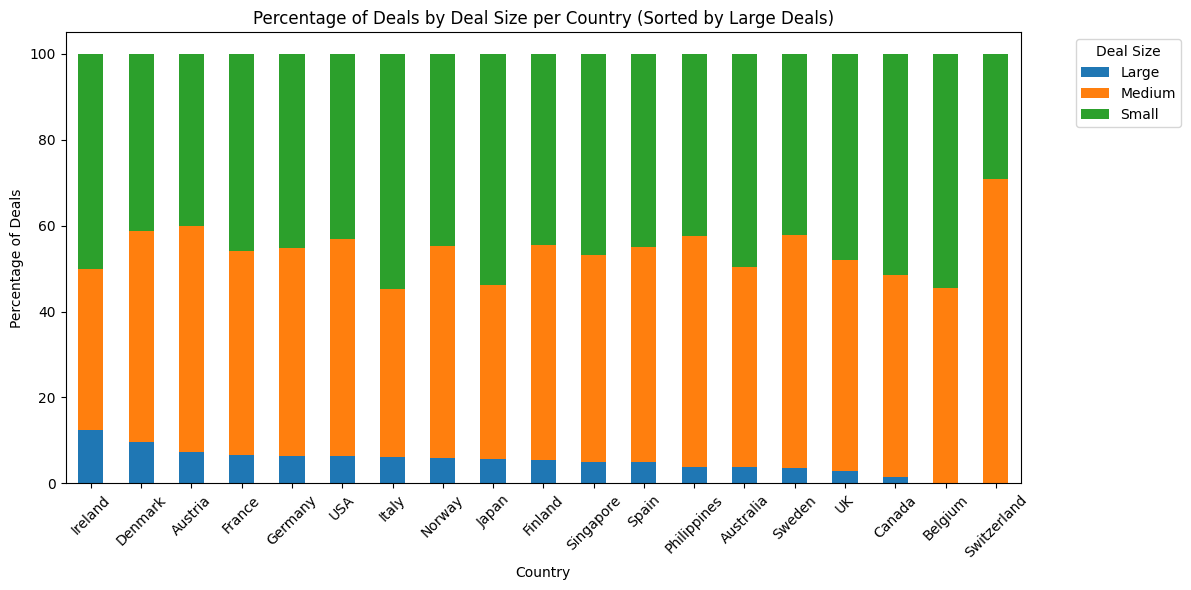

In [ ]:

# Step 1: Count number of deals per country per deal size
deal_counts = df.groupby(['COUNTRY', 'DEALSIZE']).size().unstack(fill_value=0)

# Step 2: Convert to row-wise percentages
deal_percent = deal_counts.div(deal_counts.sum(axis=1), axis=0) * 100

# Step 3: Sort by number of Large deals
deal_percent = deal_percent.sort_values(by='Large', ascending=False)


# Step 4: Plot as 100% stacked column chart
deal_percent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage of Deals by Deal Size per Country (Sorted by Large Deals)')
plt.xlabel('Country')
plt.ylabel('Percentage of Deals')
plt.xticks(rotation=45)
plt.legend(title='Deal Size', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

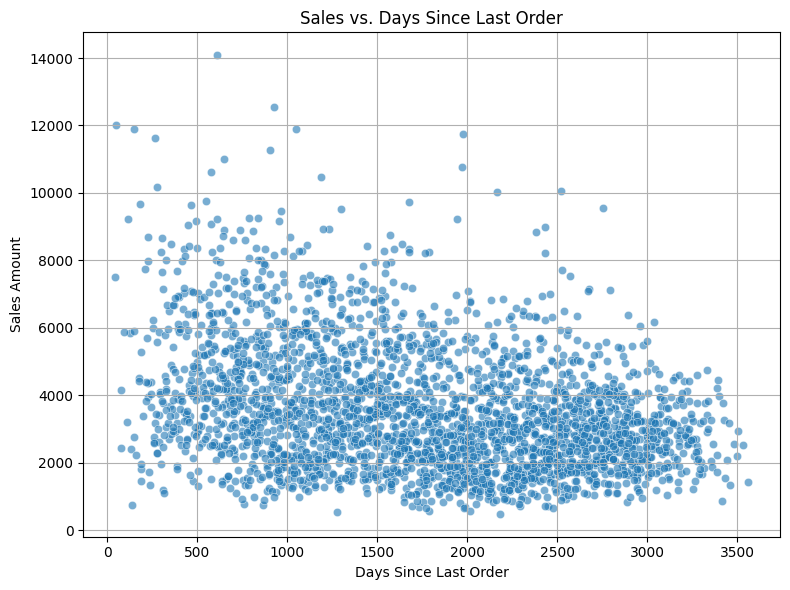

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DAYS_SINCE_LASTORDER', y='SALES', alpha=0.6)
plt.title('Sales vs. Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

##Statistical Testing
This is about applying mathematical methods to see if relationships or differences in your data are statistically significant (i.e., unlikely to be due to random chance).

###Correlation Analysis
**Purpose:** Measures how strongly two numeric variables move together.

####**Numeric vs Numeric**

**Pearson correlation:** For linear relationships.

**Spearman correlation:** For monotonic relationships (doesn’t assume linearity).

In [ ]:
df[['SALES', 'DAYS_SINCE_LASTORDER']].corr(method='pearson')

# more days since last order -> lower sales

,SALES,DAYS_SINCE_LASTORDER
SALES,1.000000,-0.334274
DAYS_SINCE_LASTORDER,-0.334274,1.000000


In [ ]:
df[['QUANTITYORDERED', 'SALES']].corr(method='pearson')

# more quantity -> more sales

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.000000,0.553359
SALES,0.553359,1.000000


In [ ]:
df[['PRICEEACH', 'SALES']].corr(method='pearson')

# more price -> more sales

,PRICEEACH,SALES
PRICEEACH,1.000000,0.808287
SALES,0.808287,1.000000


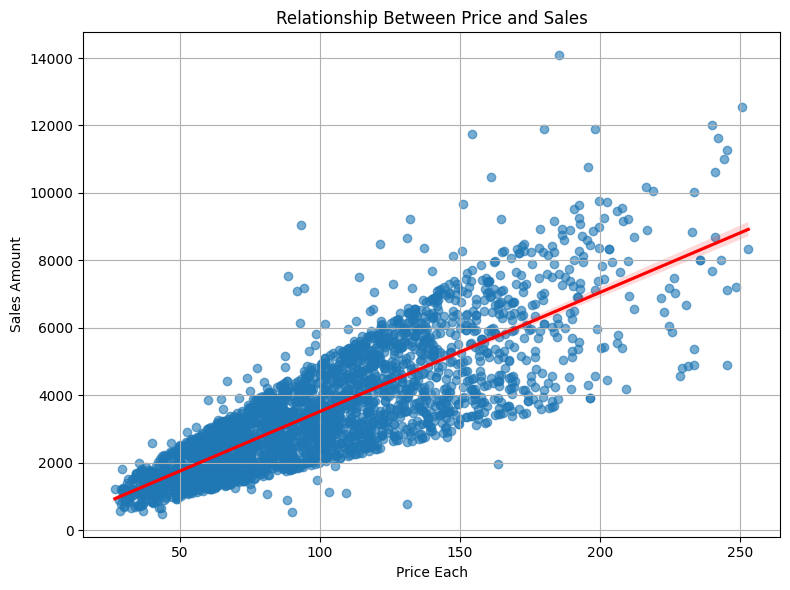

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='PRICEEACH', y='SALES', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Relationship Between Price and Sales')
plt.xlabel('Price Each')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

###**ANOVA** (Analysis of Variance)
**Purpose:** Tests whether the means of a numeric variable are significantly different across multiple groups.

####**Numeric vs Categorical**

In [ ]:
from scipy.stats import f_oneway

small_sales = df[df['DEALSIZE'] == 'Small']['SALES']
medium_sales = df[df['DEALSIZE'] == 'Medium']['SALES']
large_sales = df[df['DEALSIZE'] == 'Large']['SALES']

f_stat, p_val = f_oneway(small_sales, medium_sales, large_sales)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 4531.5809922995495, p-value: 0.0


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['SALES'], groups=df['DEALSIZE'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
 Large Medium -3885.8462   0.0 -4063.7763 -3707.9162   True
 Large  Small -6219.9804   0.0 -6398.6536 -6041.3072   True
Medium  Small -2334.1342   0.0  -2415.847 -2252.4213   True
-----------------------------------------------------------


In [ ]:
groups = [df[df['COUNTRY'] == c]['SALES'] for c in df['COUNTRY'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 0.7412737344050324, p-value: 0.7704124648047731


In [ ]:
groups = [df[df['CITY'] == c]['SALES'] for c in df['CITY'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 1.0590280875932943, p-value: 0.347564416764944


In [ ]:
groups = [df[df['CUSTOMERNAME'] == c]['SALES'] for c in df['CUSTOMERNAME'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 1.0487952211231837, p-value: 0.3591099034004181


In [ ]:
groups = [df[df['POSTALCODE'] == c]['SALES'] for c in df['POSTALCODE'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 1.083513252235195, p-value: 0.2966907606038425


In [ ]:
groups = [df[df['DEALSIZE'] == c]['DAYS_SINCE_LASTORDER'] for c in df['DEALSIZE'].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-stat: {f_stat}, p-value: {p_val}")

F-stat: 132.29295725843286, p-value: 1.4117489638763888e-55


In [ ]:
tukey = pairwise_tukeyhsd(
    endog=df['DAYS_SINCE_LASTORDER'],
    groups=df['DEALSIZE'],
    alpha=0.05
)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj  lower     upper   reject
------------------------------------------------------
 Large Medium  588.762   0.0 431.7248  745.7993   True
 Large  Small  939.666   0.0 781.9729 1097.3592   True
Medium  Small  350.904   0.0  278.786   423.022   True
------------------------------------------------------


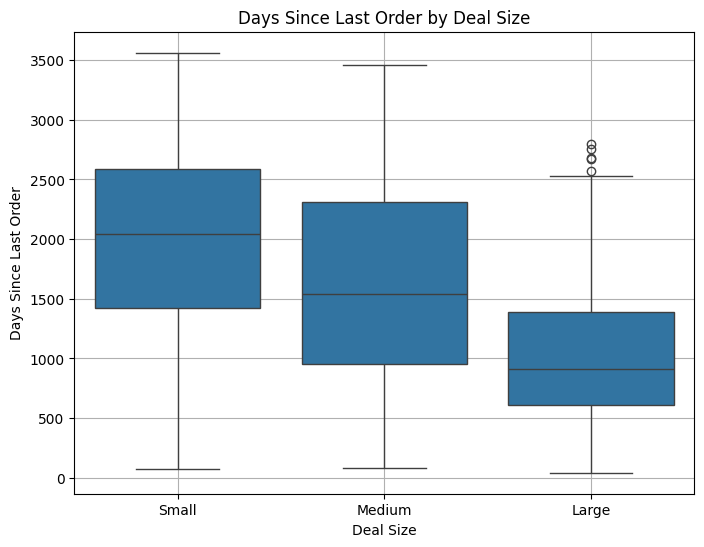

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DEALSIZE', y='DAYS_SINCE_LASTORDER', order=['Small', 'Medium', 'Large'])
plt.title('Days Since Last Order by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Days Since Last Order')
plt.grid(True)
plt.show()

###Chi-Square Test
**Purpose:** Tests if there’s a relationship between two categorical variables.

####**Categorical vs Categorical**

In [ ]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['COUNTRY'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 32.57031693215594, p-value: 0.6325005341962737


In [ ]:
table = pd.crosstab(df['CITY'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 134.96612095579184, p-value: 0.6043180289171974


In [ ]:
table = pd.crosstab(df['CUSTOMERNAME'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 162.77091320306135, p-value: 0.7542188605888895


In [ ]:
table = pd.crosstab(df['COUNTRY'], df['CITY'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 49446.0, p-value: 0.0


In [ ]:
table = pd.crosstab(df['COUNTRY'], df['CUSTOMERNAME'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 49446.0, p-value: 0.0


In [ ]:
table = pd.crosstab(df['ORDERLINENUMBER'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 45.412862581201566, p-value: 0.0913089598370299


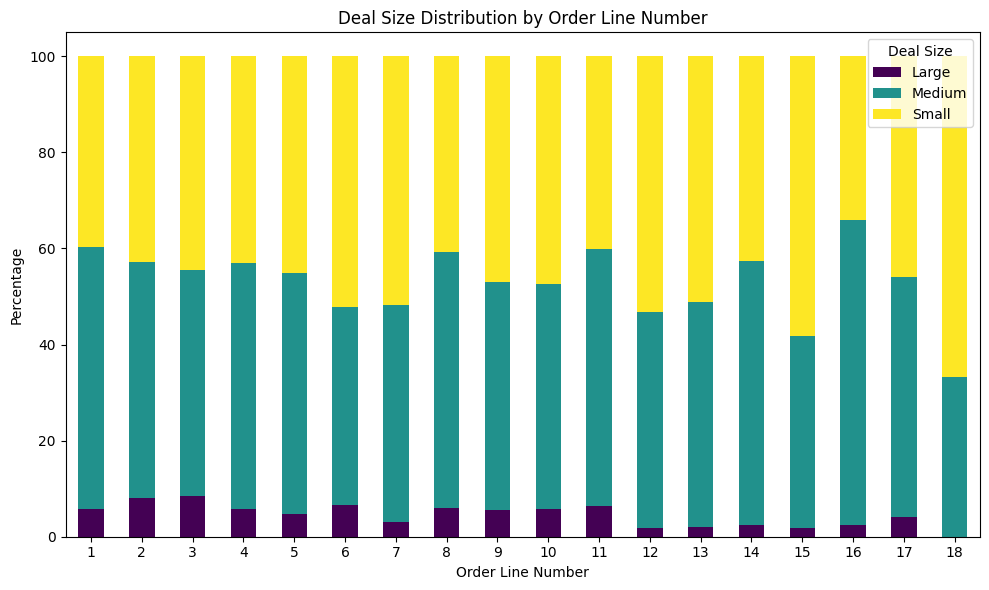

In [ ]:
ct = pd.crosstab(df['ORDERLINENUMBER'], df['DEALSIZE'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Deal Size Distribution by Order Line Number')
plt.ylabel('Percentage')
plt.xlabel('Order Line Number')
plt.xticks(rotation=0)
plt.legend(title='Deal Size')
plt.tight_layout()
plt.show()

In [ ]:
table = pd.crosstab(df['ORDERLINENUMBER'], df['COUNTRY'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 90.52398972632264, p-value: 1.0


In [ ]:
table = pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 131.91030309098508, p-value: 2.551396229653178e-22


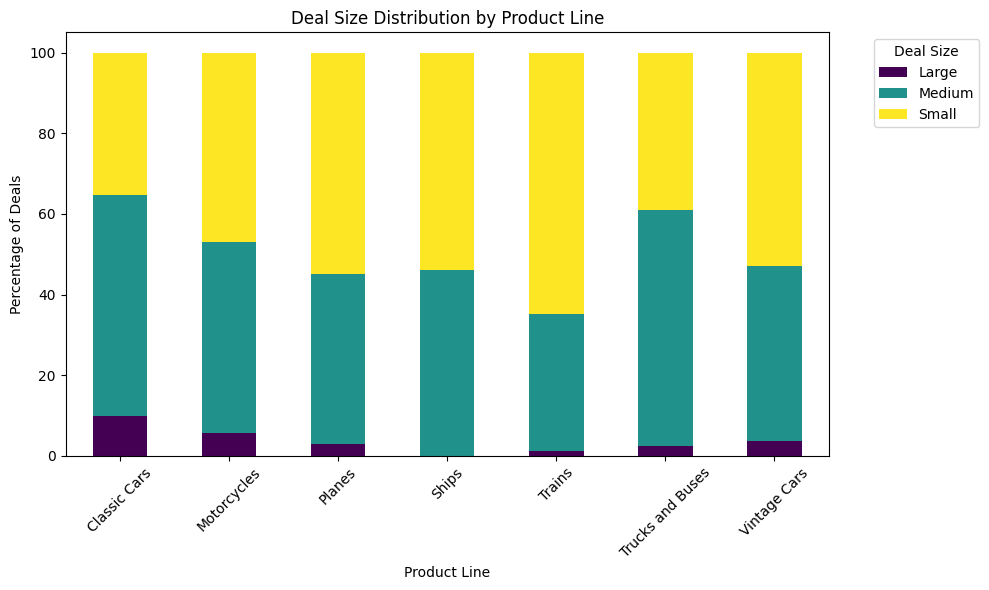

In [ ]:
# Normalize to percentages for each product line
table_pct = table.div(table.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
table_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Deal Size Distribution by Product Line')
plt.ylabel('Percentage of Deals')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.legend(title='Deal Size', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#Outlier Detection and Treatment

# Data Enrichment

In [ ]:
list(df['COUNTRY'].unique())

['USA',
 'France',
 'Norway',
 'Australia',
 'Finland',
 'Austria',
 'UK',
 'Spain',
 'Sweden',
 'Singapore',
 'Canada',
 'Japan',
 'Italy',
 'Denmark',
 'Belgium',
 'Philippines',
 'Germany',
 'Switzerland',
 'Ireland']

In [ ]:
regions = {'Europe': ['France', 'Norway','Finland', 'Austria', 'UK', 'Spain', 'Sweden','Italy', 'Denmark', 'Belgium' 'Germany', 'Switzerland', 'Ireland'],
           'Asia': ['Singapore', 'Japan', 'Philippines'],
           'North America': ['USA', 'Canada'],
           'Oceania': ['Australia'],
           'South America': None, 'Africa': None}

df['REGION'] = df['COUNTRY'].map({country: region for region, countries in regions.items() if countries is not None for country in countries})
df['REGION'] = df['REGION'].astype('category')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REGION
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,North America
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Europe
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Europe
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,North America
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,North America


In [ ]:
df.dtypes

,0
ORDERNUMBER,object
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,category
SALES,float64
ORDERDATE,datetime64[ns]
DAYS_SINCE_LASTORDER,int64
STATUS,category
PRODUCTLINE,category
MSRP,int64


In [ ]:
# Extract quarter directly
df['QUARTER'] = df['ORDERDATE'].dt.quarter

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REGION,QUARTER
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,North America,1
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Europe,2
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Europe,3
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,North America,3
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,North America,4


In [ ]:
quarterly_sales = df.groupby('QUARTER')['SALES'].sum()
print(quarterly_sales)

QUARTER
1    2254029.21
2    2048120.30
3    1758910.81
4    3699161.39
Name: SALES, dtype: float64


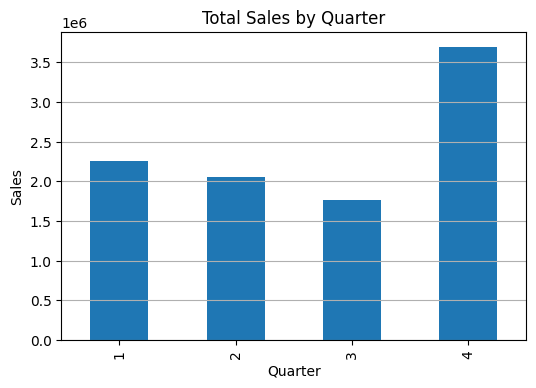

In [ ]:
quarterly_sales.plot(kind='bar', figsize=(6,4))
plt.title('Total Sales by Quarter')
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.grid(axis='y')
plt.show()

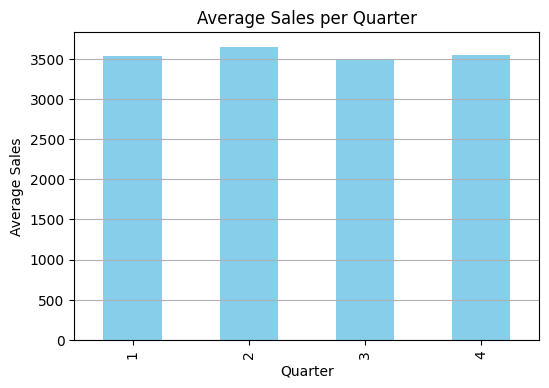

In [ ]:
# Calculate average sales per quarter
quarterly_avg_sales = df.groupby('QUARTER')['SALES'].mean()

# Plot
quarterly_avg_sales.plot(kind='bar', figsize=(6,4), color='skyblue')
plt.title('Average Sales per Quarter')
plt.ylabel('Average Sales')
plt.xlabel('Quarter')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-748231165.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_deals = df.groupby(['QUARTER', 'DEALSIZE']).size().unstack(fill_value=0)


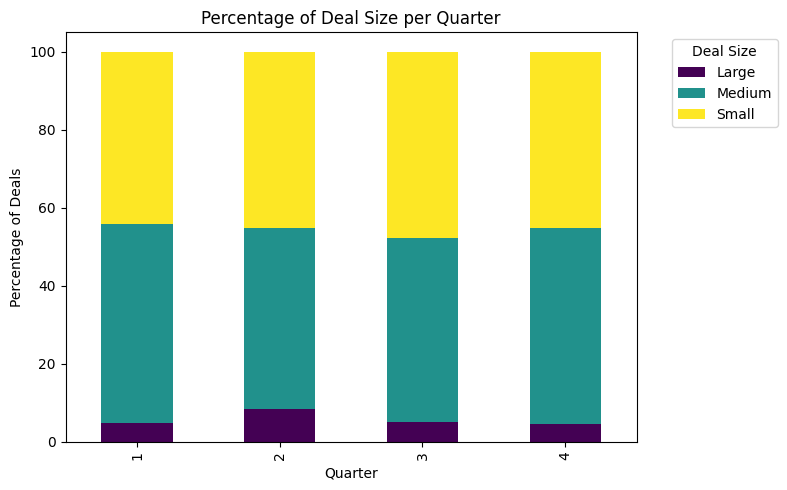

In [ ]:
# Step 1: Count deals by quarter and deal size
quarter_deals = df.groupby(['QUARTER', 'DEALSIZE']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
quarter_deals_pct = quarter_deals.div(quarter_deals.sum(axis=1), axis=0) * 100

# Step 3: Plot as 100% stacked bar chart
quarter_deals_pct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Percentage of Deal Size per Quarter')
plt.ylabel('Percentage of Deals')
plt.xlabel('Quarter')
plt.legend(title='Deal Size', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#Feature engineering

In [ ]:
# LINE-LEVEL: discount off MSRP

df['Discount_Off_MSRP'] = (df['PRICEEACH'] - df['MSRP']) / df['MSRP']
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REGION,QUARTER,Discount_Off_MSRP
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,North America,1,0.007368
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Europe,2,-0.143684
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Europe,3,-0.002737
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,North America,3,-0.123579
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,North America,4,0.017474


(-1.0, 1.0)

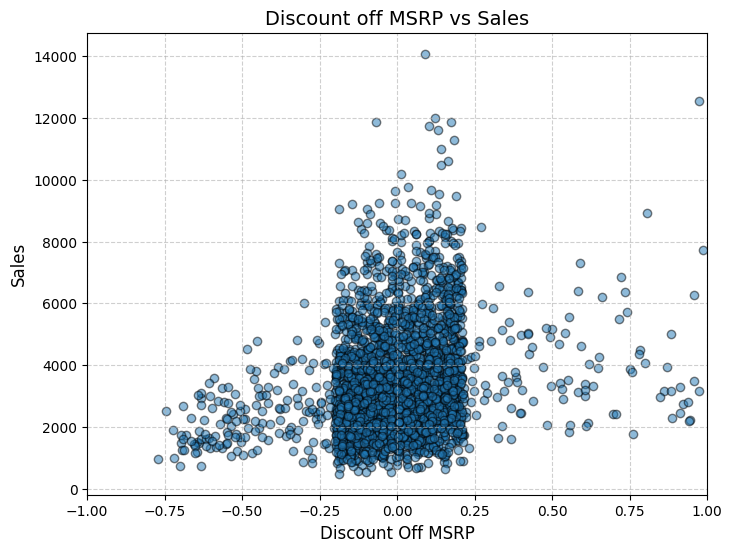

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount_Off_MSRP'], df['SALES'], alpha=0.5, edgecolor='k')

plt.title('Discount off MSRP vs Sales', fontsize=14)
plt.xlabel('Discount Off MSRP', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(-1, 1)

In [ ]:
customer_stats = df.groupby('CUSTOMERNAME').agg(
    TOTAL_ORDERS=('CUSTOMERNAME', 'count'),
    TOTAL_SALES=('SALES', 'sum'),
    AVG_QUANTITY=('QUANTITYORDERED', 'mean'),
    AVG_SALES=('SALES', 'mean'),
    AVG_DAYS_BETWEEN=('DAYS_SINCE_LASTORDER', 'mean'),
    AVG_DISCOUNT_OFF_MSRP=('Discount_Off_MSRP', 'mean')
).reset_index()

df = df.merge(customer_stats, on='CUSTOMERNAME', how='left')
df.head()

/tmp/ipython-input-265926338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_stats = df.groupby('CUSTOMERNAME').agg(


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,DEALSIZE,REGION,QUARTER,Discount_Off_MSRP,TOTAL_ORDERS,TOTAL_SALES,AVG_QUANTITY,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Small,North America,1,0.007368,49,164069.44,33.285714,3348.355918,1615.469388,0.043185
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Small,Europe,2,-0.143684,41,135042.94,34.951220,3293.730244,1840.609756,0.087220
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Medium,Europe,3,-0.002737,20,78570.34,34.200000,3928.517000,1244.400000,0.315089
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Medium,North America,3,-0.123579,30,104561.96,35.333333,3485.398667,1634.633333,0.100048
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Medium,North America,4,0.017474,34,120783.07,34.676471,3552.443235,1918.441176,0.034745


In [ ]:
# Count total orders per deal size category for each customer
deal_counts = df.groupby(['CUSTOMERNAME', 'DEALSIZE']).size().unstack(fill_value=0)

# Calculate total orders for proportion calculations
deal_counts['TOTAL_ORDERS'] = deal_counts.sum(axis=1)

# Calculate proportions
deal_counts['PCT_SMALL']  = deal_counts['Small']  / deal_counts['TOTAL_ORDERS']
deal_counts['PCT_MEDIUM'] = deal_counts['Medium'] / deal_counts['TOTAL_ORDERS']
deal_counts['PCT_LARGE']  = deal_counts['Large']  / deal_counts['TOTAL_ORDERS']

# Most common deal size per customer
deal_counts['MOST_COMMON_DEALSIZE'] = deal_counts[['Small', 'Medium', 'Large']].idxmax(axis=1)

# Merge only new columns into df
df = df.merge(
    deal_counts[['PCT_SMALL','PCT_MEDIUM','PCT_LARGE','MOST_COMMON_DEALSIZE']].reset_index(),
    on='CUSTOMERNAME',
    how='left'
)

df.head()

/tmp/ipython-input-3055105054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deal_counts = df.groupby(['CUSTOMERNAME', 'DEALSIZE']).size().unstack(fill_value=0)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,TOTAL_ORDERS,TOTAL_SALES,AVG_QUANTITY,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,49,164069.44,33.285714,3348.355918,1615.469388,0.043185,0.469388,0.510204,0.020408,Medium
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,41,135042.94,34.951220,3293.730244,1840.609756,0.087220,0.487805,0.487805,0.024390,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,20,78570.34,34.200000,3928.517000,1244.400000,0.315089,0.350000,0.500000,0.150000,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,30,104561.96,35.333333,3485.398667,1634.633333,0.100048,0.400000,0.533333,0.066667,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,34,120783.07,34.676471,3552.443235,1918.441176,0.034745,0.382353,0.588235,0.029412,Medium


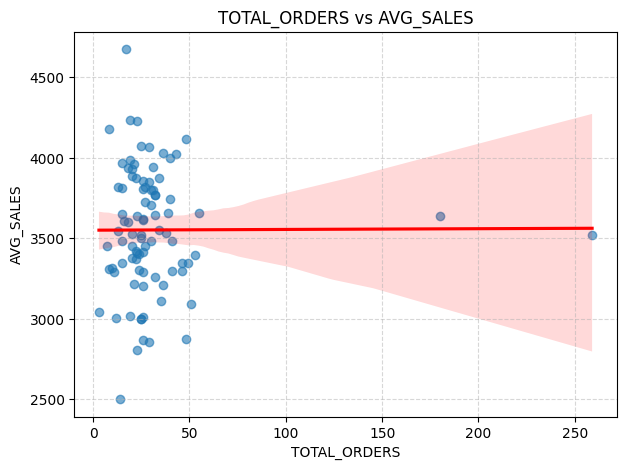

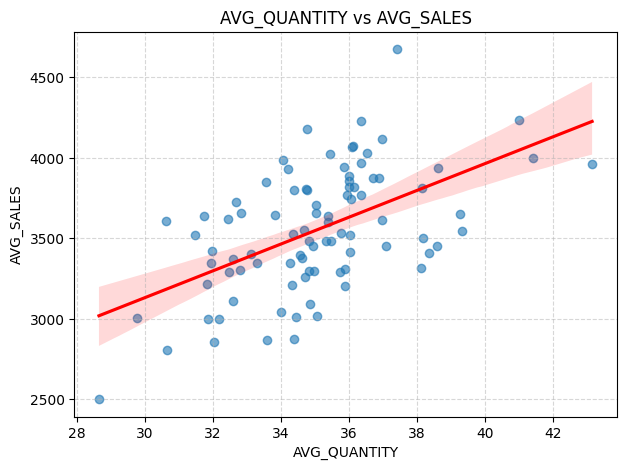

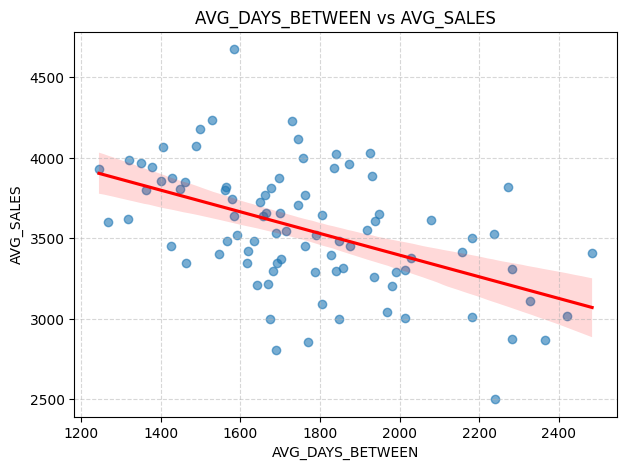

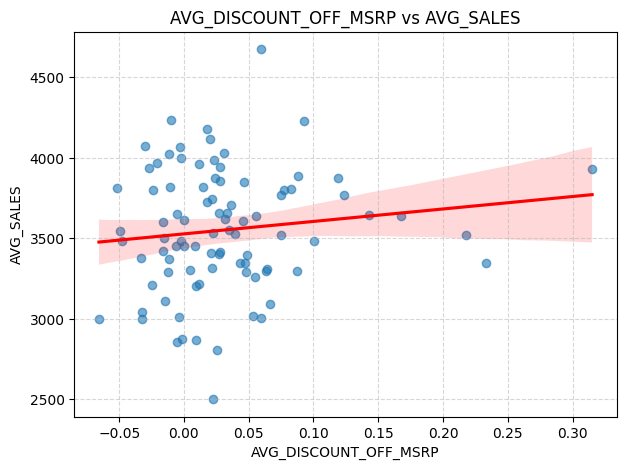

In [ ]:
features = [
    'TOTAL_ORDERS',
    'AVG_QUANTITY',
    'AVG_DAYS_BETWEEN',
    'AVG_DISCOUNT_OFF_MSRP'
]

for col in features:
    plt.figure(figsize=(7,5))
    sns.regplot(
        data=customer_stats,
        x=col,
        y='AVG_SALES',
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'}
    )
    plt.title(f'{col} vs AVG_SALES')
    plt.xlabel(col)
    plt.ylabel('AVG_SALES')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
customer_df = df[df['TOTAL_ORDERS']==10]
customer_df.sort_values(by='ORDERDATE')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,TOTAL_ORDERS,TOTAL_SALES,AVG_QUANTITY,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE
1969,10242,46,36.93,1,1698.78,2019-04-20,2377,Shipped,Vintage Cars,41,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
242,10319,30,137.06,9,4111.80,2019-11-03,453,Shipped,Motorcycles,150,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
1065,10319,46,73.98,1,3403.08,2019-11-03,1276,Shipped,Classic Cars,80,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
1160,10319,44,59.06,4,2598.64,2019-11-03,1371,Shipped,Motorcycles,62,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
1335,10319,45,175.58,3,7901.10,2019-11-03,1546,Shipped,Classic Cars,148,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
1627,10319,31,81.73,7,2533.63,2019-11-03,1838,Shipped,Motorcycles,69,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
2070,10319,43,85.69,2,3684.67,2019-11-03,2281,Shipped,Classic Cars,80,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
2144,10319,29,38.22,5,1108.38,2019-11-03,2355,Shipped,Motorcycles,40,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
2272,10319,22,119.40,8,2626.80,2019-11-03,2483,Shipped,Motorcycles,102,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small
2376,10319,45,77.29,6,3478.05,2019-11-03,2587,Shipped,Motorcycles,81,...,10,33144.93,38.1,3314.493,1856.7,0.021405,0.5,0.4,0.1,Small


In [ ]:
df = df.sort_values(['CUSTOMERNAME', 'ORDERDATE']).reset_index(drop=True)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,TOTAL_ORDERS,TOTAL_SALES,AVG_QUANTITY,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE
0,10110,37,146.84,16,5433.08,2018-03-18,1307,Shipped,Classic Cars,124,...,51,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small
1,10110,42,144.50,7,6069.00,2018-03-18,1359,Shipped,Vintage Cars,170,...,51,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small
2,10110,32,50.25,6,1608.00,2018-03-18,1459,Shipped,Vintage Cars,60,...,51,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small
3,10110,33,116.96,4,3859.68,2018-03-18,1506,Shipped,Vintage Cars,127,...,51,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small
4,10110,31,163.69,1,5074.39,2018-03-18,1604,Shipped,Vintage Cars,168,...,51,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10316,23,117.67,6,2706.41,2019-11-01,2716,Shipped,Planes,99,...,26,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small
2743,10316,48,74.45,18,3573.60,2019-11-01,2744,Shipped,Ships,72,...,26,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small
2744,10316,48,75.20,5,3609.60,2019-11-01,2819,Shipped,Planes,80,...,26,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small
2745,10316,44,62.19,7,2736.36,2019-11-01,2898,Shipped,Planes,74,...,26,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small


In [ ]:
# How many past orders existed before this row
g = df.groupby('CUSTOMERNAME', sort=False)
n_prev = g.cumcount()
df['PAST_TOTAL_ORDERS'] = n_prev
df

/tmp/ipython-input-709915939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby('CUSTOMERNAME', sort=False)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,TOTAL_SALES,AVG_QUANTITY,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE,PAST_TOTAL_ORDERS
0,10110,37,146.84,16,5433.08,2018-03-18,1307,Shipped,Classic Cars,124,...,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,0
1,10110,42,144.50,7,6069.00,2018-03-18,1359,Shipped,Vintage Cars,170,...,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,1
2,10110,32,50.25,6,1608.00,2018-03-18,1459,Shipped,Vintage Cars,60,...,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,2
3,10110,33,116.96,4,3859.68,2018-03-18,1506,Shipped,Vintage Cars,127,...,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,3
4,10110,31,163.69,1,5074.39,2018-03-18,1604,Shipped,Vintage Cars,168,...,157807.81,34.862745,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10316,23,117.67,6,2706.41,2019-11-01,2716,Shipped,Planes,99,...,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,21
2743,10316,48,74.45,18,3573.60,2019-11-01,2744,Shipped,Ships,72,...,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,22
2744,10316,48,75.20,5,3609.60,2019-11-01,2819,Shipped,Planes,80,...,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,23
2745,10316,44,62.19,7,2736.36,2019-11-01,2898,Shipped,Planes,74,...,78240.84,34.423077,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,24


In [ ]:
# PAST_TOTAL_SALES and PAST_AVG_SALES (exclude current row)
cum_sales = g['SALES'].cumsum()
df['PAST_TOTAL_SALES'] = cum_sales - df['SALES']
df['PAST_AVG_SALES']  = np.where(n_prev > 0, df['PAST_TOTAL_SALES'] / n_prev, 0)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,AVG_SALES,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE,PAST_TOTAL_ORDERS,PAST_TOTAL_SALES,PAST_AVG_SALES
0,10110,37,146.84,16,5433.08,2018-03-18,1307,Shipped,Classic Cars,124,...,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,0,0.00,0.000000
1,10110,42,144.50,7,6069.00,2018-03-18,1359,Shipped,Vintage Cars,170,...,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,1,5433.08,5433.080000
2,10110,32,50.25,6,1608.00,2018-03-18,1459,Shipped,Vintage Cars,60,...,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,2,11502.08,5751.040000
3,10110,33,116.96,4,3859.68,2018-03-18,1506,Shipped,Vintage Cars,127,...,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,3,13110.08,4370.026667
4,10110,31,163.69,1,5074.39,2018-03-18,1604,Shipped,Vintage Cars,168,...,3094.270784,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,4,16969.76,4242.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10316,23,117.67,6,2706.41,2019-11-01,2716,Shipped,Planes,99,...,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,21,64129.07,3053.765238
2743,10316,48,74.45,18,3573.60,2019-11-01,2744,Shipped,Ships,72,...,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,22,66835.48,3037.976364
2744,10316,48,75.20,5,3609.60,2019-11-01,2819,Shipped,Planes,80,...,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,23,70409.08,3061.264348
2745,10316,44,62.19,7,2736.36,2019-11-01,2898,Shipped,Planes,74,...,3009.263077,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,24,74018.68,3084.111667


In [ ]:
# PAST_AVG_QUANTITY (exclude current row)
cum_quantity = g['QUANTITYORDERED'].cumsum()
df['PAST_AVG_QUANTITY'] = np.where(n_prev > 0, cum_quantity - df['QUANTITYORDERED'], 0)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,AVG_DAYS_BETWEEN,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE,PAST_TOTAL_ORDERS,PAST_TOTAL_SALES,PAST_AVG_SALES,PAST_AVG_QUANTITY
0,10110,37,146.84,16,5433.08,2018-03-18,1307,Shipped,Classic Cars,124,...,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,0,0.00,0.000000,0
1,10110,42,144.50,7,6069.00,2018-03-18,1359,Shipped,Vintage Cars,170,...,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,1,5433.08,5433.080000,37
2,10110,32,50.25,6,1608.00,2018-03-18,1459,Shipped,Vintage Cars,60,...,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,2,11502.08,5751.040000,79
3,10110,33,116.96,4,3859.68,2018-03-18,1506,Shipped,Vintage Cars,127,...,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,3,13110.08,4370.026667,111
4,10110,31,163.69,1,5074.39,2018-03-18,1604,Shipped,Vintage Cars,168,...,1803.803922,0.066228,0.490196,0.490196,0.019608,Small,4,16969.76,4242.440000,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10316,23,117.67,6,2706.41,2019-11-01,2716,Shipped,Planes,99,...,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,21,64129.07,3053.765238,698
2743,10316,48,74.45,18,3573.60,2019-11-01,2744,Shipped,Ships,72,...,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,22,66835.48,3037.976364,721
2744,10316,48,75.20,5,3609.60,2019-11-01,2819,Shipped,Planes,80,...,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,23,70409.08,3061.264348,769
2745,10316,44,62.19,7,2736.36,2019-11-01,2898,Shipped,Planes,74,...,2180.807692,-0.003751,0.576923,0.423077,0.000000,Small,24,74018.68,3084.111667,817


In [ ]:
# PAST_AVG_DISCOUNT_OFF_MSRP (exclude current row)
cum_discount = g['Discount_Off_MSRP'].cumsum()
df['PAST_AVG_DISCOUNT_OFF_MSRP'] = np.where(n_prev > 0, cum_discount - df['Discount_Off_MSRP'], 0)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,AVG_DISCOUNT_OFF_MSRP,PCT_SMALL,PCT_MEDIUM,PCT_LARGE,MOST_COMMON_DEALSIZE,PAST_TOTAL_ORDERS,PAST_TOTAL_SALES,PAST_AVG_SALES,PAST_AVG_QUANTITY,PAST_AVG_DISCOUNT_OFF_MSRP
0,10110,37,146.84,16,5433.08,2018-03-18,1307,Shipped,Classic Cars,124,...,0.066228,0.490196,0.490196,0.019608,Small,0,0.00,0.000000,0,0.000000
1,10110,42,144.50,7,6069.00,2018-03-18,1359,Shipped,Vintage Cars,170,...,0.066228,0.490196,0.490196,0.019608,Small,1,5433.08,5433.080000,37,0.184194
2,10110,32,50.25,6,1608.00,2018-03-18,1459,Shipped,Vintage Cars,60,...,0.066228,0.490196,0.490196,0.019608,Small,2,11502.08,5751.040000,79,0.034194
3,10110,33,116.96,4,3859.68,2018-03-18,1506,Shipped,Vintage Cars,127,...,0.066228,0.490196,0.490196,0.019608,Small,3,13110.08,4370.026667,111,-0.128306
4,10110,31,163.69,1,5074.39,2018-03-18,1604,Shipped,Vintage Cars,168,...,0.066228,0.490196,0.490196,0.019608,Small,4,16969.76,4242.440000,144,-0.207362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10316,23,117.67,6,2706.41,2019-11-01,2716,Shipped,Planes,99,...,-0.003751,0.576923,0.423077,0.000000,Small,21,64129.07,3053.765238,698,0.007622
2743,10316,48,74.45,18,3573.60,2019-11-01,2744,Shipped,Ships,72,...,-0.003751,0.576923,0.423077,0.000000,Small,22,66835.48,3037.976364,721,0.196208
2744,10316,48,75.20,5,3609.60,2019-11-01,2819,Shipped,Planes,80,...,-0.003751,0.576923,0.423077,0.000000,Small,23,70409.08,3061.264348,769,0.230236
2745,10316,44,62.19,7,2736.36,2019-11-01,2898,Shipped,Planes,74,...,-0.003751,0.576923,0.423077,0.000000,Small,24,74018.68,3084.111667,817,0.170236


/tmp/ipython-input-2514959808.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CUSTOMERNAME', 'ORDERDATE'])['PAST_AVG_SALES']
/tmp/ipython-input-2514959808.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CUSTOMERNAME')['PAST_AVG_SALES']


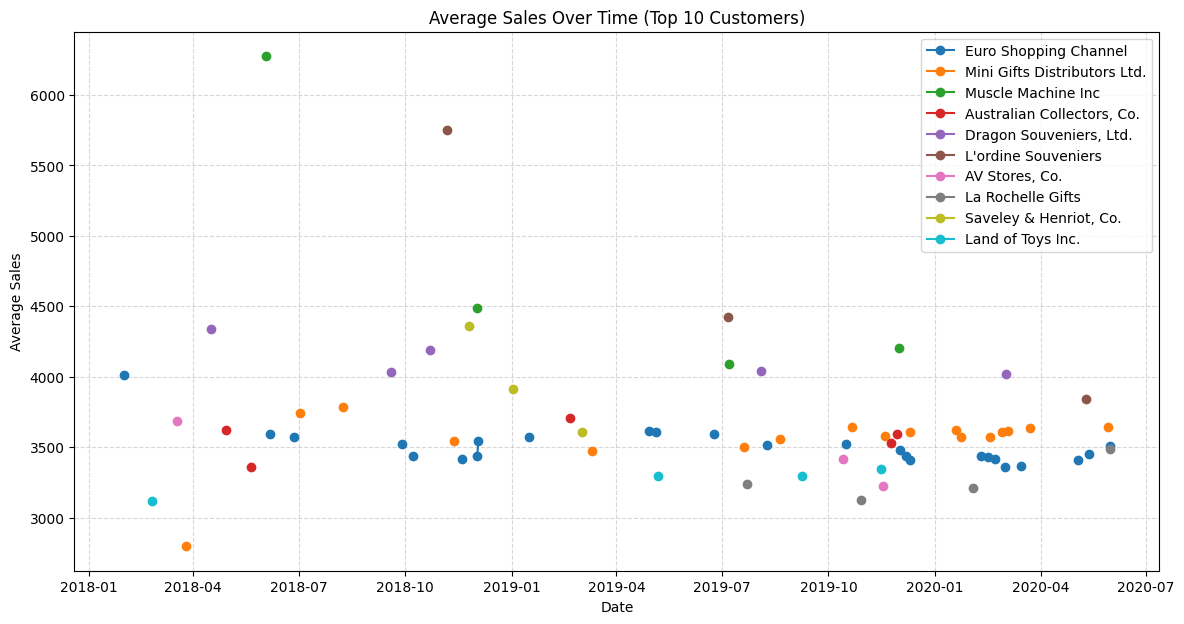

In [ ]:
# Average sales per customer per date
customer_avg_sales = (
    df.groupby(['CUSTOMERNAME', 'ORDERDATE'])['PAST_AVG_SALES']
      .mean().reset_index()
)

# Select top 10 customers by total sales
top10_customers = (
    df.groupby('CUSTOMERNAME')['PAST_AVG_SALES']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)

plt.figure(figsize=(14,7))
for customer in top10_customers:
    temp = customer_avg_sales[customer_avg_sales['CUSTOMERNAME'] == customer]
    plt.plot(temp['ORDERDATE'], temp['PAST_AVG_SALES'], marker='o', label=customer)

plt.title("Average Sales Over Time (Top 10 Customers)")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# bar